EXAMEN FINAL PYTHON 2 - José Augusto Chunga Castilla 

In [13]:
#Librerias 
import numpy as np
import pandas as pd
import tensorflow as tf
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import recall_score, precision_score
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts

In [2]:
"""
Establezca 2 modelos de clasificación para el data Iris
"""

'\nEstablezca 2 modelos de clasificación para el data Iris\n'

Primer Modelo - Implementando el método KNN

In [3]:
dfiris = datasets.load_iris()
X = dfiris.data
y = dfiris.target
y = np.reshape(y,(150,1))

# Dividimos la data
Xtrain, Xtest, ytrain, ytest = tts(X,y,test_size = 0.30, random_state = 42)

###Entrenamiento de la data (AJUSTE)
#Crear el modelo
modeloKNN = knn(n_neighbors = 3)
modeloKNN.fit(Xtrain,ytrain)

#Hacer una prediccion de los valores de prueba
ypredi1 = modeloKNN.predict(Xtest)
ypredtrain = modeloKNN.predict(Xtrain) 

#score_total
score_totaltrain = modeloKNN.score(Xtrain,ytrain)
recallscoretrain = recall_score(ytrain,ypredtrain,average='micro')
precisionscoretrain = precision_score(ytrain,ypredtrain,average='micro')

print("El score en entrenamiento es ", score_totaltrain)
print("El recall en recallscoretrain es", recallscoretrain)
print("La precision en entrenamiento es", precisionscoretrain)

print('-'*50)
print('-'*50)

score_totalvalidation = modeloKNN.score(Xtest,ytest)
recallscorevalidation = recall_score(ytest,ypredi1,average='micro')
precisionscorevalidation = precision_score(ytest,ypredi1,average='micro')

print("El score en validacion es ", score_totalvalidation)
print("El recall en validacion es", recallscorevalidation)
print("La precision en validacion es", precisionscorevalidation)


El score en entrenamiento es  0.9428571428571428
El recall en recallscoretrain es 0.9428571428571428
La precision en entrenamiento es 0.9428571428571428
--------------------------------------------------
--------------------------------------------------
El score en validacion es  1.0
El recall en validacion es 1.0
La precision en validacion es 1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Segundo Modelo - Implementando un Regresor Logistico

In [4]:
dfiris = datasets.load_iris()
X = dfiris.data
y = dfiris.target
y = np.reshape(y,(150,1))

Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.20, random_state = 32)
modellogist = LogisticRegression(max_iter=150)
modellogist.fit(Xtrain,ytrain)
####
ypredtest = modellogist.predict(Xtest)
ypredtrain = modellogist.predict(Xtrain)
###
score_totalentrenamiento = modellogist.score(Xtrain,ytrain)
recallscoreentrenamiento = recall_score(ytrain,ypredtrain,average='micro')
precisionentrenamiento = precision_score(ytrain,ypredtrain,average='micro')
print("score_total de entrenamiento: ",round(score_totalentrenamiento,2))
print("recallscore de entrenamiento: ",round(recallscoreentrenamiento,2))
print("precision de entrenamiento: ",round(precisionentrenamiento,2))

print('-'*50)
print('-'*50)

score_total = modellogist.score(Xtest,ytest)
recallscore = recall_score(ytest,ypredtest,average='micro')
precision = precision_score(ytest,ypredtest,average='micro')
print("score_total: ",round(score_total,2))
print("recallscore: ",round(recallscore,2))
print("precision: ",round(precision,2))

score_total de entrenamiento:  0.96
recallscore de entrenamiento:  0.96
precision de entrenamiento:  0.96
--------------------------------------------------
--------------------------------------------------
score_total:  1.0
recallscore:  1.0
precision:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""

'\nEvalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses\n'

Primer Modelo con PCA

       Suburb           Address  ...             Regionname Propertycount
0  Abbotsford      85 Turner St  ...  Northern Metropolitan        4019.0
1  Abbotsford   25 Bloomburg St  ...  Northern Metropolitan        4019.0
2  Abbotsford      5 Charles St  ...  Northern Metropolitan        4019.0
3  Abbotsford  40 Federation La  ...  Northern Metropolitan        4019.0
4  Abbotsford       55a Park St  ...  Northern Metropolitan        4019.0

[5 rows x 21 columns]
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Todos los valores de la primera fila
[ 2.000000e+00  1.480000e+06  2.500000e+00  3.067000e+03  2.000000e+00
  1.000000e+00  2.020000e+02 -3.779960e+01  1.449984e+02  4.019000e+03]
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Visualizacion del x escalado en la primera fila
[

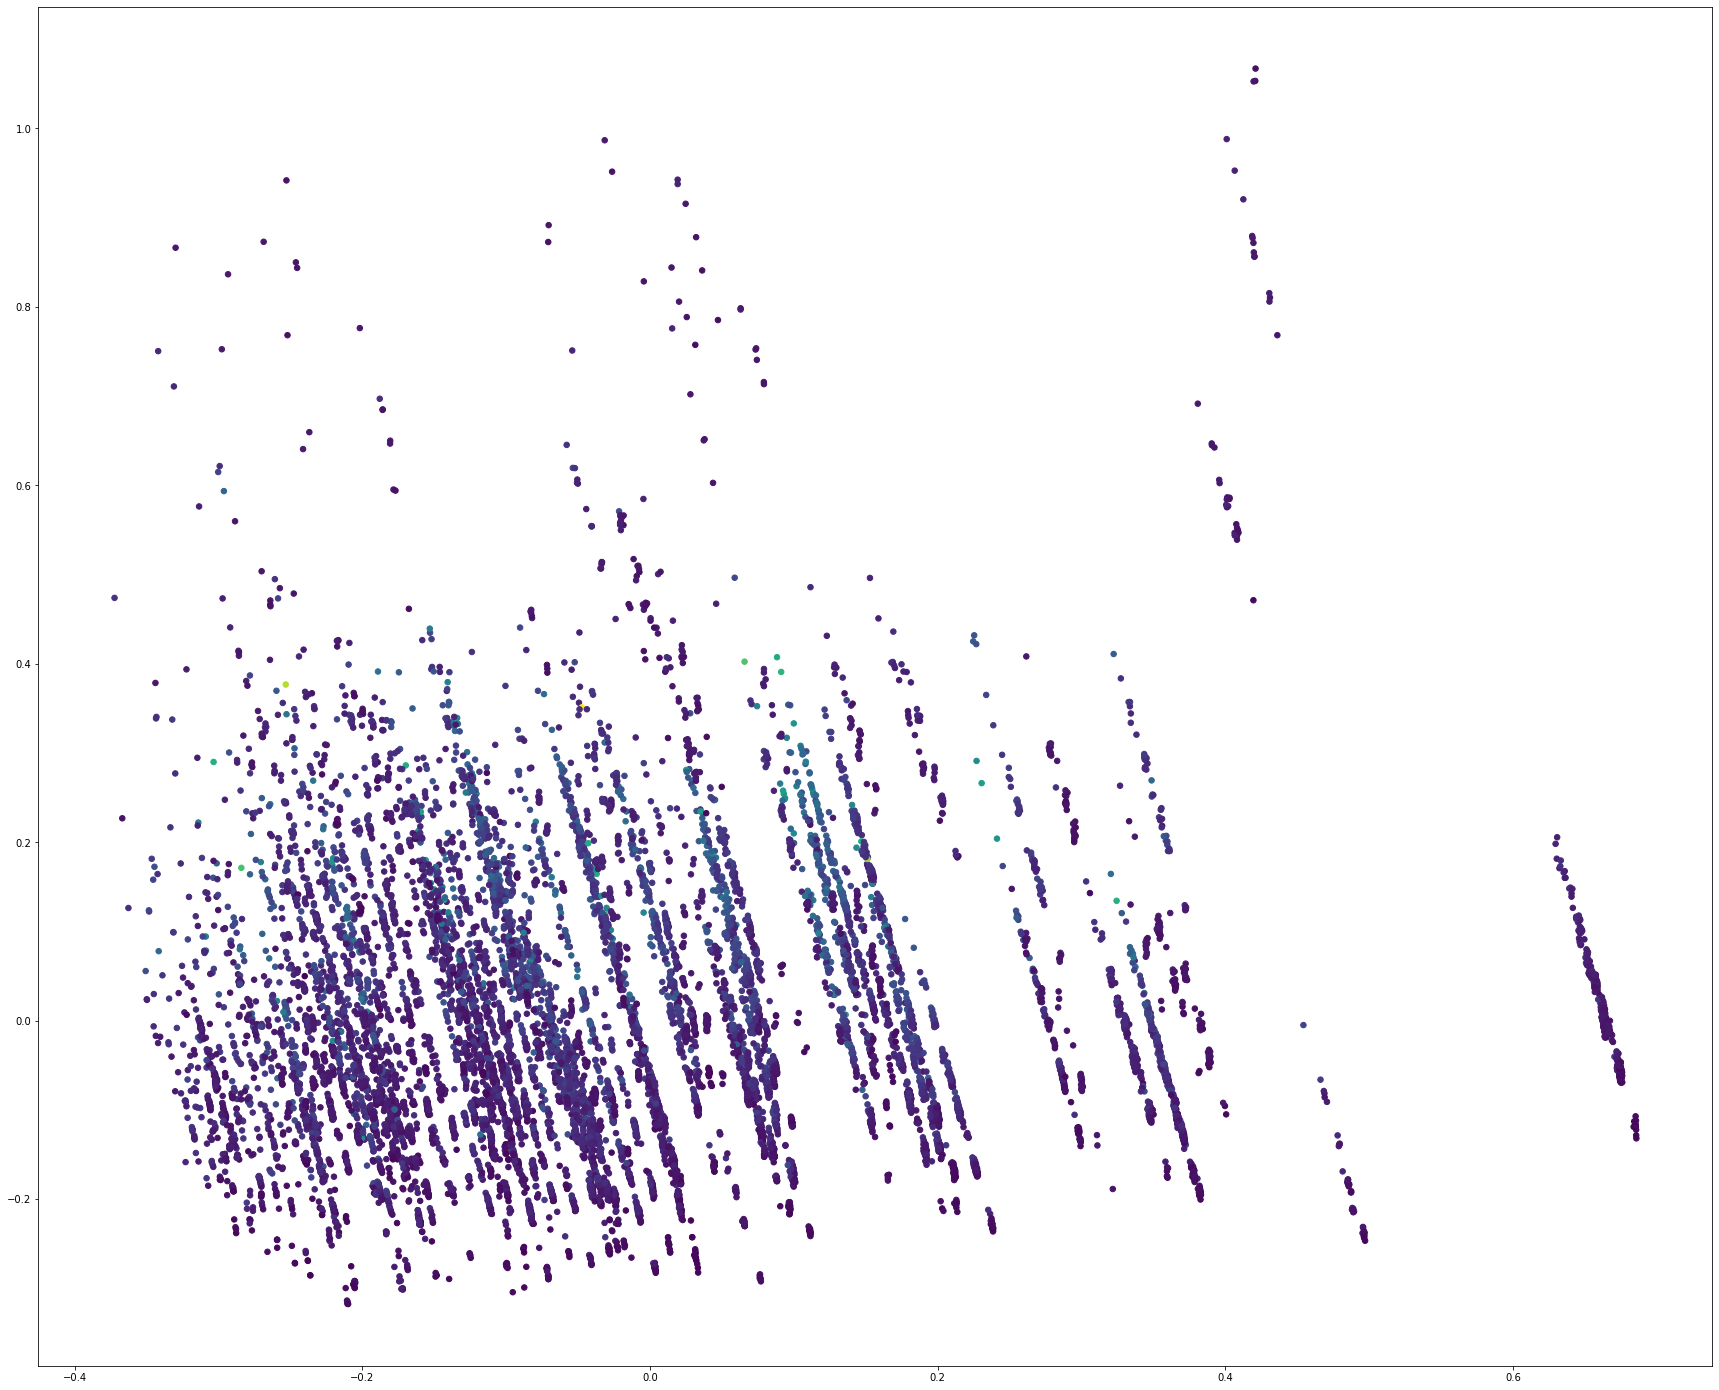

In [6]:
dfmelhou = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
print(dfmelhou.head())
print("-"*75)
print("-"*75)
X = np.array(dfmelhou.drop(columns = ['Suburb','Address','Type','Method','SellerG','Date','Car','BuildingArea','YearBuilt','CouncilArea','Regionname']))
print("Todos los valores de la primera fila")
print(X[0,:])
print("-"*75)
print("-"*75)
#Escalamiento
escalador = MinMaxScaler()
X_escalado = escalador.fit_transform(X)
print("Visualizacion del x escalado en la primera fila")
print(X_escalado[0,:])

###### Aplicando PCA ###### 
#Hacer el análisis de los componentes principales
pca1 = PCA(n_components=2) # Reducción dimensional a 2 dimensiones
#Generar el valor de la matriz de autovectores
pca1.fit(X_escalado)
Xpca = pca1.transform(X_escalado)
print("-"*75)
print("-"*75)
#print(np.shape(pca1.components_))

### Diferenciar entre X_escalado y Xpca
print("Diferencia entre X_escalado y Xpca: ")
print(X_escalado[0,:])
print("-"*75)
print(Xpca[0,:])

### Podemos hacer un gráfico de dispersión de clases
#print(np.shape(Xpca))
#Definimos el y
y = np.array(dfmelhou['Price'])
#print(np.shape(y))

print("="*75)
print("="*75)

print("Gráfico de dispersión mediante Matplotlib:")
plt.figure(figsize = (30,25))
plt.scatter(Xpca[:,0],Xpca[:,1],c= y, s = 30)
plt.show()

Segundo Modelo sin PCA implementando un Regresor Logistico

In [7]:
dfmelhou = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv')
print(dfmelhou.head())

X = np.array(dfmelhou.drop(columns = ['Suburb','Address','Type','Method','SellerG','Date','Car','BuildingArea','YearBuilt','CouncilArea','Regionname']))
y = np.array(dfmelhou['Rooms'])
y = np.reshape(y,(13580,1))

Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.20, random_state = 32)
modellogist = LogisticRegression(max_iter=300)
modellogist.fit(Xtrain,ytrain)
####
ypredtest = modellogist.predict(Xtest)
ypredtrain = modellogist.predict(Xtrain)
###
score_totalentrenamiento = modellogist.score(Xtrain,ytrain)
recallscoreentrenamiento = recall_score(ytrain,ypredtrain,average='micro')
precisionentrenamiento = precision_score(ytrain,ypredtrain,average='micro')
print("score_total de entrenamiento: ",round(score_totalentrenamiento,2))
print("recallscore de entrenamiento: ",round(recallscoreentrenamiento,2))
print("precision de entrenamiento: ",round(precisionentrenamiento,2))

print('-'*50)
print('-'*50)

score_total = modellogist.score(Xtest,ytest)
recallscore = recall_score(ytest,ypredtest,average='micro')
precision = precision_score(ytest,ypredtest,average='micro')
print("score_total: ",round(score_total,2))
print("recallscore: ",round(recallscore,2))
print("precision: ",round(precision,2))

       Suburb           Address  ...             Regionname Propertycount
0  Abbotsford      85 Turner St  ...  Northern Metropolitan        4019.0
1  Abbotsford   25 Bloomburg St  ...  Northern Metropolitan        4019.0
2  Abbotsford      5 Charles St  ...  Northern Metropolitan        4019.0
3  Abbotsford  40 Federation La  ...  Northern Metropolitan        4019.0
4  Abbotsford       55a Park St  ...  Northern Metropolitan        4019.0

[5 rows x 21 columns]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


score_total de entrenamiento:  0.46
recallscore de entrenamiento:  0.46
precision de entrenamiento:  0.46
--------------------------------------------------
--------------------------------------------------
score_total:  0.46
recallscore:  0.46
precision:  0.46


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [8]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""

'\n¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? \n'

In [9]:
df_wine = pd.read_excel('/content/wine.xlsx')
print(df_wine.head())
print("-"*75)
print("-"*75)

#Paso Nro 1: Obtener la matriz de características. 
X_featuresdf = df_wine.drop(columns = ['description'])
X_featuresarray = np.array(X_featuresdf)
### Encoding => Variables de texto
X_feat_country = X_featuresdf['country']
X_feat_country_array = np.array(X_feat_country)
from sklearn.preprocessing import LabelEncoder
Encoder = LabelEncoder()
Encoder.fit(X_feat_country_array)
x_gen_encoder = Encoder.fit_transform(X_feat_country_array)
#print(x_gen_encoder)
## Eliminar el X_gen e ingresamos el xgencodificado
X_singen = X_featuresdf.drop(columns = ['country'])
X_singen['CountryEscalado'] = x_gen_encoder
print(X_singen.head())
print("-"*75)
print("-"*75)

countryescalado_array = np.array(X_singen['CountryEscalado'])
X = np.c_[countryescalado_array]
y = np.array(df_wine['points'])
#print(np.shape(X))
y = np.reshape(y,(150930,1))
#print(np.shape(y))
Xtrain,Xtest,ytrain,ytest = tts(X,y,random_state = 42, test_size = 0.25) #dividimos la data
modeloRF = RFR(random_state= 42)
modeloRF.fit(Xtrain,ytrain) #Entrenamos el modelo
### Verificamos los resultados
ypred = modeloRF.predict(Xtest)
r2RF = r2_score(ytest,ypred)
print("Validacion: ",r2RF)
### Cómo evalúo si existe subajuste o sobreajuste
#Comparar los resultados de entrenamiento y los de prueba
ypred_train = modeloRF.predict(Xtrain)
r2RT = r2_score(ytrain,ypred_train)
print("Entrenamiento: ",r2RT)
print("No existe sobreajuste")

   Unnamed: 0 country  ...             variety                   winery
0           0      US  ...  Cabernet Sauvignon                    Heitz
1           1   Spain  ...       Tinta de Toro  Bodega Carmen Rodríguez
2           2      US  ...     Sauvignon Blanc                 Macauley
3           3      US  ...          Pinot Noir                    Ponzi
4           4  France  ...  Provence red blend     Domaine de la Bégude

[5 rows x 11 columns]
---------------------------------------------------------------------------
---------------------------------------------------------------------------
   Unnamed: 0  ... CountryEscalado
0           0  ...              44
1           1  ...              40
2           2  ...              44
3           3  ...              44
4           4  ...              15

[5 rows x 10 columns]
---------------------------------------------------------------------------
---------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Validacion:  0.059549588390307995
Entrenamiento:  0.06139315660579714
No existe sobreajuste


In [ ]:
"""
Puedes graficar un modelo de deep learning para la dataset de breast-cancer
"""

Epoch 1/400
14/14 [==============================] - 1s 2ms/step - loss: 0.6907 - accuracy: 0.6455
Epoch 2/400
14/14 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6479
Epoch 3/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6684 - accuracy: 0.6479
Epoch 4/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.6479
Epoch 5/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6393 - accuracy: 0.6479
Epoch 6/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6257 - accuracy: 0.6479
Epoch 7/400
14/14 [==============================] - 0s 2ms/step - loss: 0.6127 - accuracy: 0.6502
Epoch 8/400
14/14 [==============================] - 0s 2ms/step - loss: 0.5993 - accuracy: 0.6643
Epoch 9/400
14/14 [==============================] - 0s 2ms/step - loss: 0.5862 - accuracy: 0.6831
Epoch 10/400
14/14 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7324
Epoch 11/

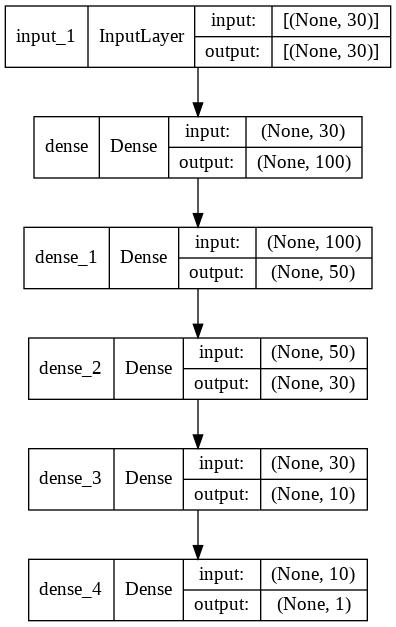

In [10]:
dfbreast = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/clase6/breast-cancer.csv')
dfX = dfbreast.drop(columns = ['id','diagnosis'])
y = np.array(dfbreast['diagnosis'])
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)
y = np.reshape(y,(len(y),1))
#print(y[:4])
#print(np.shape(y))
escalar = MinMaxScaler()
X = np.array(dfX)
X = escalar.fit_transform(X)
#print(X[0:4,:])
Xtrain,Xtest,ytrain,ytest = tts(X,y)

## Crear el modelo
ModeloClasificador = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(100,activation = 'relu'),
      tf.keras.layers.Dense(50,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])
ModeloClasificador.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')
ModeloClasificador.fit(Xtrain,ytrain,epochs = 400)

print('-'*150)
print('-'*150)

ypred_train = np.round(ModeloClasificador.predict(Xtrain),0)
ypred_test = np.round(ModeloClasificador.predict(Xtest),0)
#print(ypred_train[0:4])
recall_clasificadortest = recall_score(ytest,ypred_test)
recall_clasificadort = recall_score(ytrain,ypred_train)
print("El recall en entrenamiento es: ", recall_clasificadort)
print("El recall en validación es: ", recall_clasificadortest)

print('-'*150)
print('-'*150)

#Describo la gráfica del modelo anterior
ModeloClasificador.build()
ModeloClasificador.summary()

print('-'*150)
print('-'*150)

#Para la visualización gráfica
plot_model(model = ModeloClasificador,show_shapes = True)

In [11]:
"""
Crea una función que aplane la ruta de una imágen
"""

'\nCrea una función que aplane la ruta de una imágen\n'

In [12]:
#Creación de función que aplane la ruta de una imágen
def Funcionflatten(L):
  vector = []
  for image in L:
    for item in image:
      vector.append(item)
      result = vector
  return result

###Creamos una lista de imagenes
#images = [img1,img2,img3]
images = [[1,5,11],[2,3,8],[10,52,21]]
#Probando la función
print(Funcionflatten(images))

[1, 5, 11, 2, 3, 8, 10, 52, 21]
